In [10]:
# 第一个cell：设置环境和导入库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
import sys
import warnings
import matplotlib.pyplot as plt
from IPython.display import display

# 设置中文显示和忽略警告
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [11]:
csv_path = 'D:\大三下作业合集\时空大数据\汇报\自然灾害\地震文本分析\csv数据集\中国地震台网地震目录.csv'
df = pd.read_csv(csv_path)
df = df.rename(columns={"震源深度(Km)": "Depth_Km"})
# 显示数据前几行
print("\n数据前5行：")
display(df.head())


数据前5行：


,序号,发震时刻(国际时),经度(°),纬度(°),Depth_Km,Ms,Ms7,mL,mb,mB,地点
0,1,2017-08-21 01:12:14,94.84,30.39,8,4.0,3.8,4.0,4.5,4.7,中国西藏自治区
1,2,2017-08-15 22:49:43,74.01,38.28,7,3.9,3.7,4.4,4.6,4.7,塔吉克斯坦-中国新疆维吾尔自治区边境地区
2,3,2017-08-15 05:16:03,106.16,23.21,6,4.1,4.0,4.5,4.3,4.5,中国东南部
3,4,2017-08-15 03:58:16,124.74,45.35,7,4.6,4.4,4.9,4.5,4.6,中国东北部
4,5,2017-08-14 11:26:01,83.71,41.32,12,4.2,3.8,4.8,4.5,4.5,中国新疆维吾尔自治区南部


In [12]:
# 第三个cell：特征工程
# 选择特征列和目标列
feature_columns = ["Depth_Km", "Ms7", "mL", "mb", "mB"]
target_column = "Ms"

# 处理缺失值：用中位数填充
df[feature_columns] = df[feature_columns].fillna(df[feature_columns].median())

# 标准化特征
scaler = MinMaxScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# 重命名标准化后的列
normalized_columns = [f"normalized_{col}" for col in feature_columns]
df[normalized_columns] = df[feature_columns]
df = df.drop(columns=feature_columns)

# 提取特征和目标变量
X = df[normalized_columns].values
y = df[target_column].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n数据预处理完成！")
print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")


数据预处理完成！
训练集样本数: 8000
测试集样本数: 2000


In [13]:
# 初始化模型
models = {
    "线性回归": LinearRegression(),
    "决策树": DecisionTreeRegressor(random_state=42),
    "随机森林": RandomForestRegressor(random_state=42),
    "梯度提升": GradientBoostingRegressor(random_state=42)
}

# 存储模型结果
results = []

print("开始模型训练和评估...\n")

for name, model in models.items():
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 存储结果
    results.append({
        "模型": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })
    
    # 打印结果
    print(f"=== {name} ===")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}\n")

# 转换为DataFrame便于显示
results_df = pd.DataFrame(results)
display(results_df)

开始模型训练和评估...

=== 线性回归 ===
MSE: 0.5062
RMSE: 0.7115
MAE: 0.3133
R²: 0.8817

=== 决策树 ===
MSE: 1.0106
RMSE: 1.0053
MAE: 0.3735
R²: 0.7638

=== 随机森林 ===
MSE: 0.5913
RMSE: 0.7690
MAE: 0.3199
R²: 0.8618

=== 梯度提升 ===
MSE: 0.4839
RMSE: 0.6956
MAE: 0.3033
R²: 0.8869



,模型,MSE,RMSE,MAE,R²
0,线性回归,0.506191,0.711471,0.313262,0.881694
1,决策树,1.010593,1.005282,0.373543,0.763806
2,随机森林,0.591325,0.768977,0.319885,0.861796
3,梯度提升,0.483896,0.695627,0.303311,0.886904


<Figure size 1008x720 with 0 Axes>

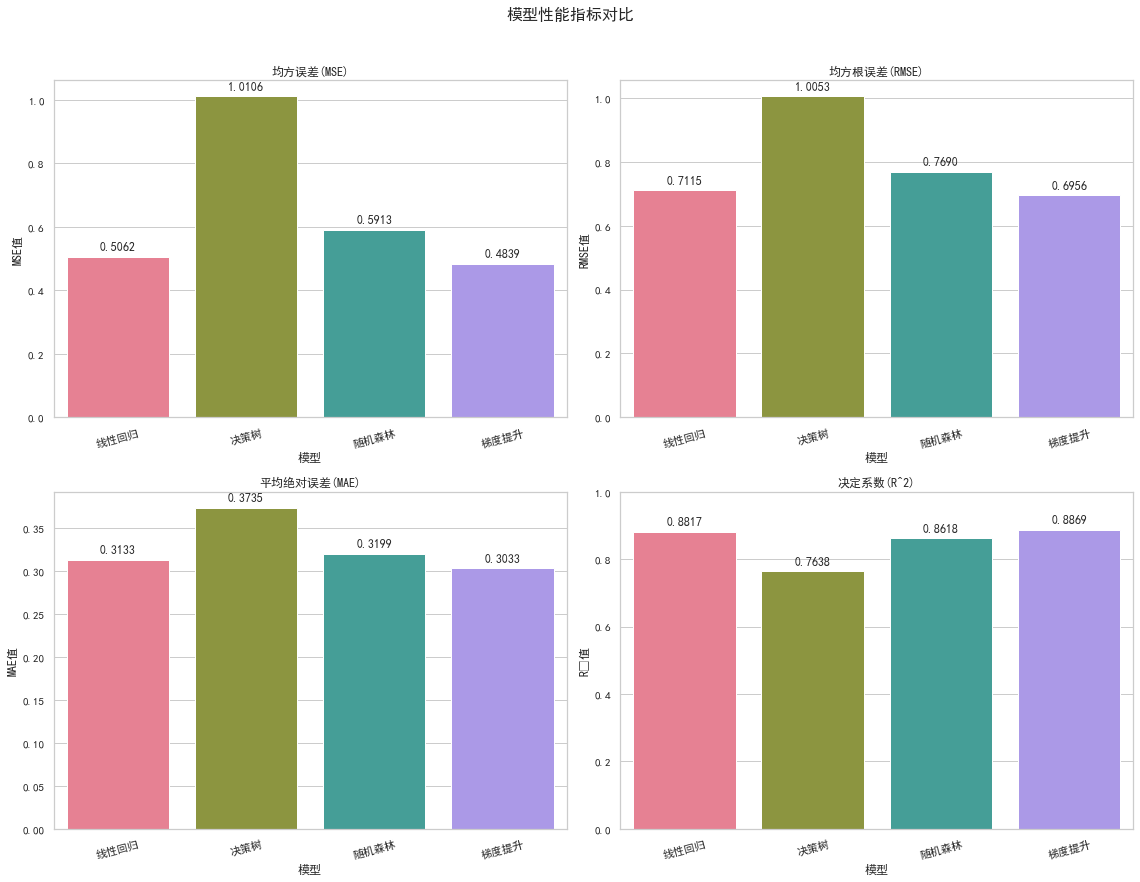

In [14]:
# Cell 5: 使用Seaborn的美化可视化
import seaborn as sns

# 设置Seaborn样式
sns.set(style="whitegrid", palette="pastel", font="SimHei")
plt.figure(figsize=(14, 10))

# 准备数据 - 将结果转换为长格式便于Seaborn绘图
metrics_df = results_df.melt(id_vars="模型", var_name="指标", value_name="值")

# 创建4个子图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('模型性能指标对比', fontsize=16, y=1.02)

# 自定义调色板
palette = sns.color_palette("husl", len(models))

# 绘制MSE图表
sns.barplot(x="模型", y="值", data=metrics_df[metrics_df["指标"]=="MSE"], 
            ax=axes[0,0], palette=palette)
axes[0,0].set_title("均方误差(MSE)", fontsize=12)
axes[0,0].set_ylabel("MSE值")
axes[0,0].tick_params(axis='x', rotation=15)
for p in axes[0,0].patches:
    axes[0,0].annotate(f"{p.get_height():.4f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# 绘制RMSE图表
sns.barplot(x="模型", y="值", data=metrics_df[metrics_df["指标"]=="RMSE"], 
            ax=axes[0,1], palette=palette)
axes[0,1].set_title("均方根误差(RMSE)", fontsize=12)
axes[0,1].set_ylabel("RMSE值")
axes[0,1].tick_params(axis='x', rotation=15)
for p in axes[0,1].patches:
    axes[0,1].annotate(f"{p.get_height():.4f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# 绘制MAE图表
sns.barplot(x="模型", y="值", data=metrics_df[metrics_df["指标"]=="MAE"], 
            ax=axes[1,0], palette=palette)
axes[1,0].set_title("平均绝对误差(MAE)", fontsize=12)
axes[1,0].set_ylabel("MAE值")
axes[1,0].tick_params(axis='x', rotation=15)
for p in axes[1,0].patches:
    axes[1,0].annotate(f"{p.get_height():.4f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# 绘制R²图表
sns.barplot(x="模型", y="值", data=metrics_df[metrics_df["指标"]=="R²"], 
            ax=axes[1,1], palette=palette)
axes[1,1].set_title("决定系数(R^2)", fontsize=12)
axes[1,1].set_ylabel("R²值")
axes[1,1].set_ylim(0, 1)  # R²范围固定在0-1
axes[1,1].tick_params(axis='x', rotation=15)
for p in axes[1,1].patches:
    axes[1,1].annotate(f"{p.get_height():.4f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()